In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


In [5]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

In [6]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [7]:
model = Sequential()
model.add(Dense(512, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2

In [36]:
history=model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 9s 25ms/step - loss: 0.0440 - accuracy: 0.9919 - val_loss: 0.1035 - val_accuracy: 0.9804
Epoch 2/10
375/375 [==============================] - 9s 25ms/step - loss: 0.0197 - accuracy: 0.9953 - val_loss: 0.1053 - val_accuracy: 0.9826
Epoch 3/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0137 - accuracy: 0.9967 - val_loss: 0.1078 - val_accuracy: 0.9827
Epoch 4/10
375/375 [==============================] - 9s 25ms/step - loss: 0.0120 - accuracy: 0.9968 - val_loss: 0.1105 - val_accuracy: 0.9833
Epoch 5/10
375/375 [==============================] - 9s 25ms/step - loss: 0.0117 - accuracy: 0.9971 - val_loss: 0.1219 - val_accuracy: 0.9828
Epoch 6/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.1276 - val_accuracy: 0.9824
Epoch 7/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0085 - accuracy: 0.9977 - val_loss: 0.1298 - val_accuracy: 0.9837

In [37]:
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred,axis=1)
y_pred_class

array([7, 2, 1, ..., 4, 5, 6])

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,y_pred_class)

array([[ 972,    1,    0,    1,    0,    0,    4,    1,    1,    0],
       [   0, 1129,    0,    0,    0,    1,    2,    1,    2,    0],
       [   0,    3, 1016,    3,    1,    0,    1,    4,    3,    1],
       [   0,    0,    1,  998,    0,    3,    0,    3,    3,    2],
       [   0,    3,    1,    0,  962,    0,    7,    1,    0,    8],
       [   1,    0,    0,    9,    2,  873,    2,    1,    2,    2],
       [   1,    2,    0,    0,    1,    6,  947,    0,    1,    0],
       [   1,    1,    4,    2,    0,    0,    0, 1016,    2,    2],
       [   1,    2,    3,    9,    2,    1,    1,    4,  947,    4],
       [   0,    3,    0,    5,    6,    3,    0,    4,    3,  985]])

In [39]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


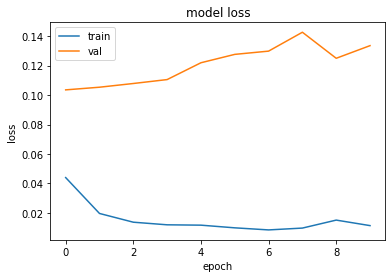

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

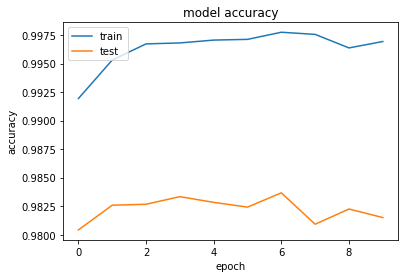

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

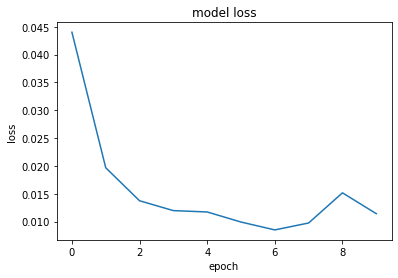

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
